In [1]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

'''
algorithm:
    0: 加权蒸馏 0.880
    1: 逐个蒸馏 0.850
    2: 服务器交换参数 0.825
    3: 服务器单独训练, 不使用公开数据 0.881
    4: 服务器单独训练，使用公开数据 0.872
model:
    1: CNN
    2: LeNet5
    3: ResNet18
'''

data = {}
algorithms = [0, 1, 2]
for algo in algorithms:
    file_path = f'./res/mnist_model_1_algo_2/alpha_0.5_T_6/server_commu_30_client_commu_5_client_train_5_batch_size_160_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
    data[algo] = torch.load(file_path, map_location='cpu')

legends = {0: 'algorithm 0', 1: 'algorithm 1', 2: 'algorithm 2', 3: 'algorithm 3', 4: 'algorithm 4'}

print(data.keys())

dict_keys([0, 1, 2])


0.5894472002983093 [0.23929648101329803, 0.2660301625728607, 0.27306532859802246, 0.2762814164161682, 0.32452261447906494, 0.34733667969703674, 0.37477385997772217, 0.3882412016391754, 0.4061306416988373, 0.4128643274307251, 0.42653265595436096, 0.44120603799819946, 0.4462311565876007, 0.4506532549858093, 0.44954773783683777, 0.46170854568481445, 0.4690452218055725, 0.4744723439216614, 0.47396984696388245, 0.4872361719608307, 0.48452261090278625, 0.4894472360610962, 0.49075376987457275, 0.4982914626598358, 0.5098492503166199, 0.5107537508010864, 0.5108542442321777, 0.5105527639389038, 0.5175879597663879, 0.5170854330062866, 0.520904541015625, 0.5231155753135681, 0.5236181020736694, 0.5284422039985657, 0.5254271030426025, 0.535879373550415, 0.5353769063949585, 0.5344723463058472, 0.5434170961380005, 0.5433166027069092, 0.5413065552711487, 0.5421105623245239, 0.5409045219421387, 0.549045205116272, 0.548341691493988, 0.5485426783561707, 0.5511557459831238, 0.5505527853965759, 0.5488442182

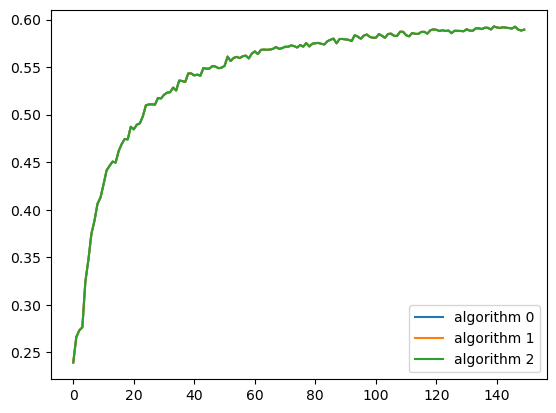

In [10]:
i = 1
for algo in algorithms:
    server_acc = data[algo]['server_acc']
    num_line = len(server_acc[0])
    x = numpy.arange(num_line)
    y = server_acc[i]
    plt.plot(x, y, label=legends[algo])
    print(y[-1], list(y))
plt.legend()
plt.show()

0.610519250233968 [0.28931322197119397, 0.3124958177407583, 0.3310217758019765, 0.3659631510575612, 0.4238525927066803, 0.44395309686660767, 0.4728643099466959, 0.4901507397492727, 0.5055611232916514, 0.5111557642618815, 0.5238525768121084, 0.5347068707148234, 0.5422780613104503, 0.5478056867917379, 0.547973205645879, 0.5568174123764038, 0.5561474164326985, 0.5616415143013, 0.563919593890508, 0.5721607903639475, 0.5704187651475271, 0.5727303226788839, 0.574941356976827, 0.577085425456365, 0.582680066426595, 0.586432158946991, 0.5855946342150371, 0.5840200980504353, 0.5915243029594421, 0.5892127354939779, 0.592529316743215, 0.5915242830912273, 0.595142384370168, 0.5983919501304626, 0.5971859097480774, 0.5990954637527466, 0.6002345085144043, 0.6011390288670857, 0.6048911213874817, 0.6042211055755615, 0.6050251324971516, 0.60331658522288, 0.603886087735494, 0.6075376669565836, 0.6073031624158224, 0.607336660226186, 0.6068006555239359, 0.6084422071774801, 0.6095812320709229, 0.610519250233

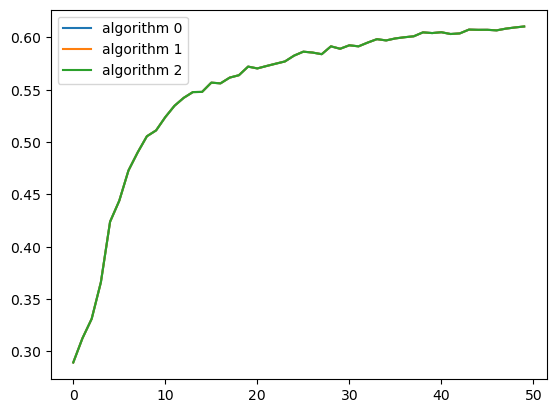

In [3]:
server_acc_mean = {}
num_line = len(data[algo]['server_acc'][0])
for algo in algorithms:
    server_acc_mean[algo] = numpy.zeros(num_line).tolist()
    for i in [0, 1, 2]:
        server_acc = data[algo]['server_acc']
        server_acc_mean[algo] += (numpy.array(server_acc[i]) / numpy.array(len(data[algo]['server_acc'])))
end_point = 50
x = numpy.arange(num_line)[:end_point]
for algo in algorithms:
    y = server_acc_mean[algo][:end_point]
    plt.plot(x, y, label=legends[algo])
    print(y[-1], list(y))
plt.legend()
plt.show()

0.6363819241523743 [0.14482411742210388, 0.1244221106171608, 0.2989949584007263, 0.28763818740844727, 0.30643215775489807, 0.3012060225009918, 0.307135671377182, 0.30834171175956726, 0.30783918499946594, 0.3053266406059265, 0.3174874484539032, 0.3232160806655884, 0.32281407713890076, 0.33909547328948975, 0.3423115611076355, 0.37256279587745667, 0.4026130735874176, 0.38271355628967285, 0.4272361695766449, 0.3882412016391754, 0.4090452194213867, 0.3962813913822174, 0.44040200114250183, 0.40753769874572754, 0.47638189792633057, 0.4666331708431244, 0.46542713046073914, 0.479497492313385, 0.4689447283744812, 0.4878391921520233, 0.4976884424686432, 0.5007035136222839, 0.5167838931083679, 0.5009045004844666, 0.5167838931083679, 0.5176884531974792, 0.5280401706695557, 0.5151758790016174, 0.5181909203529358, 0.5501507520675659, 0.5346733331680298, 0.5543718338012695, 0.5547738671302795, 0.5638191103935242, 0.5510552525520325, 0.5627135634422302, 0.5630150437355042, 0.5600000023841858, 0.5648241

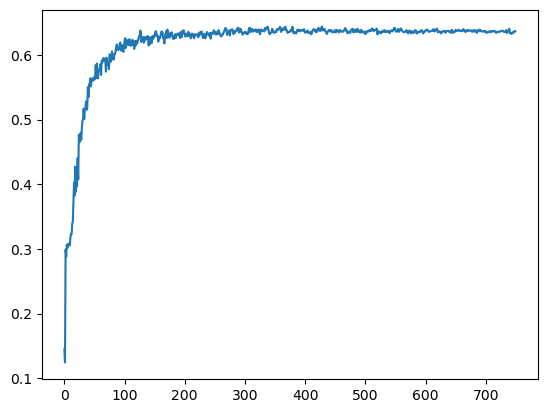

In [4]:
client_acc = data[0]['client_acc']
num_line = len(client_acc[0])
x = numpy.arange(num_line)
i = 0
y = client_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.057605765759944916 [2.26800537109375, 2.2520999908447266, 2.2183873653411865, 2.193124771118164, 2.1502685546875, 2.1171460151672363, 2.071737289428711, 2.0276029109954834, 2.0271239280700684, 1.950194001197815, 1.9224106073379517, 1.841789960861206, 1.7623193264007568, 1.7500996589660645, 1.6786361932754517, 1.6680357456207275, 1.6232770681381226, 1.5335153341293335, 1.5413870811462402, 1.4540431499481201, 1.4020233154296875, 1.3897291421890259, 1.399678349494934, 1.3714759349822998, 1.3574825525283813, 1.380692720413208, 1.2400280237197876, 1.3236311674118042, 1.218144178390503, 1.3434674739837646, 1.2646206617355347, 1.1933982372283936, 1.2070763111114502, 1.1228218078613281, 1.0119796991348267, 1.3365261554718018, 1.1370099782943726, 1.0195740461349487, 1.0400593280792236, 1.0508191585540771, 1.0566020011901855, 0.9407752156257629, 0.9037391543388367, 1.0294122695922852, 0.9831350445747375, 0.8773783445358276, 0.8986943364143372, 0.9181922078132629, 0.8768178820610046, 0.79509830

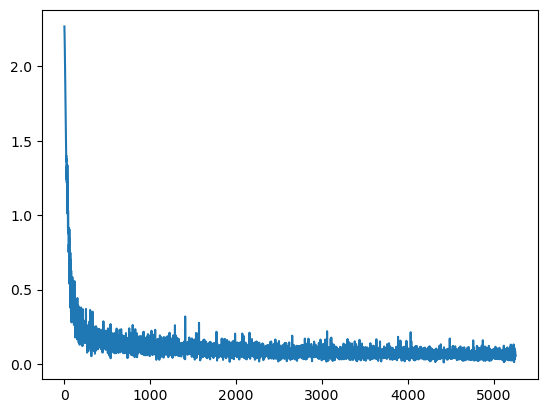

In [5]:
client_loss = data[0]['client_loss']
num_line = len(client_loss[0])
x = numpy.arange(num_line)
i = 6
y = client_loss[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

[[0.4958333671092987, 0.4166666865348816, 0.9125000238418579, 0.8708333969116211, 0.9458333849906921, 0.9375000596046448, 0.9500000476837158, 0.9541667103767395, 0.9500000476837158, 0.9458333849906921, 0.9583333730697632, 0.9708333611488342, 0.9541667103767395, 0.9666666984558105, 0.9708333611488342, 0.9708333611488342, 0.9708333611488342, 0.9708333611488342, 0.9583333730697632, 0.9708333611488342, 0.9708333611488342, 0.9708333611488342, 0.9708333611488342, 0.9750000238418579, 0.9750000238418579, 0.9750000238418579, 0.9750000238418579, 0.9750000238418579, 0.9708333611488342, 0.9791667461395264, 0.9750000238418579, 0.9750000238418579, 0.9708333611488342, 0.9750000238418579, 0.9708333611488342, 0.9750000238418579, 0.9750000238418579, 0.9708333611488342, 0.9750000238418579, 0.9708333611488342, 0.9791667461395264, 0.9791667461395264, 0.9791667461395264, 0.9791667461395264, 0.9791667461395264, 0.9791667461395264, 0.9791667461395264, 0.9791667461395264, 0.9750000238418579, 0.9750000238418579

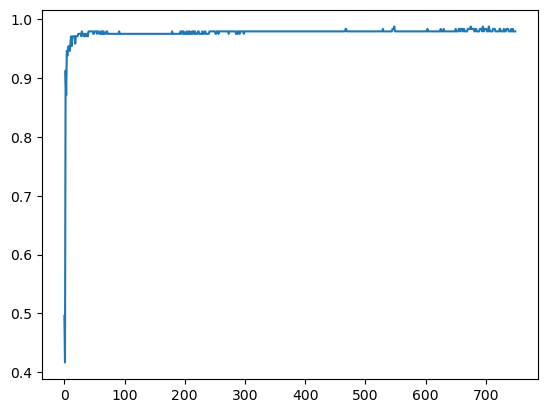

In [6]:
train_acc = data[0]['validate_acc']
print(train_acc)
num_line = len(train_acc[0])
x = numpy.arange(num_line)
i = 0
y = train_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()